<a href="https://colab.research.google.com/github/luthf-ai/seni_komputer/blob/main/week11/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : AIDO LUTHFI AL HAKIM
# Kelas : TI - 3A
# Absen : 6
# NIM : 2141720136

##Kelompok:
####- Aido Lutfhi AL Hakim | 2141720136
####- Jauhar Maulana A'la | 2141720186
####- Naufal Falah Wafiuddin | 2141720129
Link GitHub : https://github.com/luthf-ai/seni_komputer

## TEMPLATE MATCHING

In [ ]:
# Import library
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cat_bunny = cv.imread("/content/drive/MyDrive/PCVK/Object Detection/cats_and_bunnies.jpg")
cat_template = cv.imread("/content/drive/MyDrive/PCVK/Object Detection/cat2_templatejpg.jpg", 0)

Text(0.5, 1.0, 'cat template')

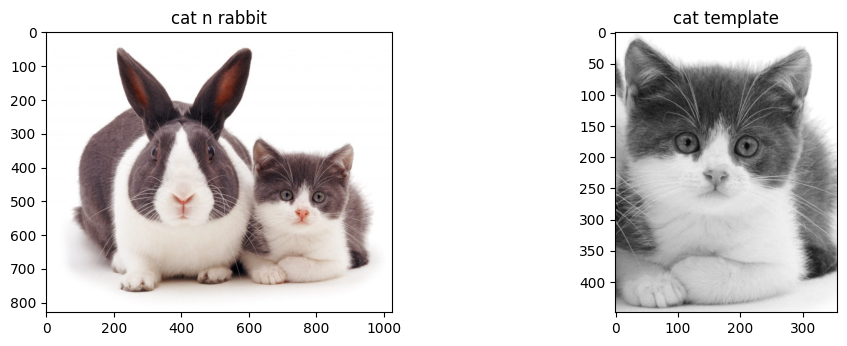

In [ ]:
# Tampilkan gambar dan histogram
plt.figure(figsize=(12, 8))

# Tampilkan citra asli dan citra tersegmentasi
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(cat_bunny, cv.COLOR_BGR2RGB))
plt.title('cat n rabbit')

plt.subplot(2, 2, 2)
plt.imshow(cat_template, cmap='gray')
plt.title('cat template')

In [ ]:
def MatchingMethod(param, name):
  match_method = param

  img_display = cat_bunny.copy()

  cat_bunny_gray = cv.cvtColor(cat_bunny, cv.COLOR_BGR2GRAY)

  method_accepts_mask = (cv.TM_SQDIFF == match_method or match_method == cv.TM_CCORR_NORMED)
  if (method_accepts_mask):
    result = cv.matchTemplate(cat_bunny_gray, cat_template, match_method, None, cat_template)
  else:
    result = cv.matchTemplate(cat_bunny_gray, cat_template, match_method)


  # cv.normalize( result, result, 0, 1, cv.NORM_MINMAX, -1 )

  (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)


  if (match_method == cv.TM_SQDIFF or match_method == cv.TM_SQDIFF_NORMED):
    (startX, startY) = minLoc
  else:
    (startX, startY) = maxLoc

  endX = startX + cat_template.shape[1]
  endY = startY + cat_template.shape[0]

  cv.rectangle(img_display, (startX, startY), (endX, endY), (0, 0, 255), 3)
  # cv.rectangle(img_display, matchLoc, (matchLoc[0] + cat_template.shape[0], matchLoc[1] + cat_template.shape[1]), (255,0,0), 2, 8, 0 )
  # cv.rectangle(result, matchLoc, (matchLoc[0] + cat_template.shape[0], matchLoc[1] + cat_template.shape[1]), (0,0,0), 2, 8, 0 )

  plt.figure(figsize=(12, 8))

  plt.subplot(2, 2, 1)
  plt.imshow(result, cmap='gray')
  plt.title(name)

  plt.subplot(2, 2, 2)
  plt.imshow(cv.cvtColor(img_display, cv.COLOR_BGR2RGB))
  plt.title('cat template')

  pass

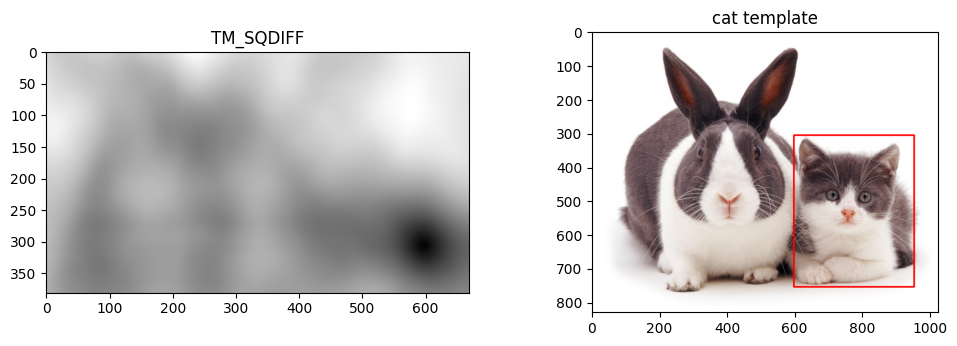

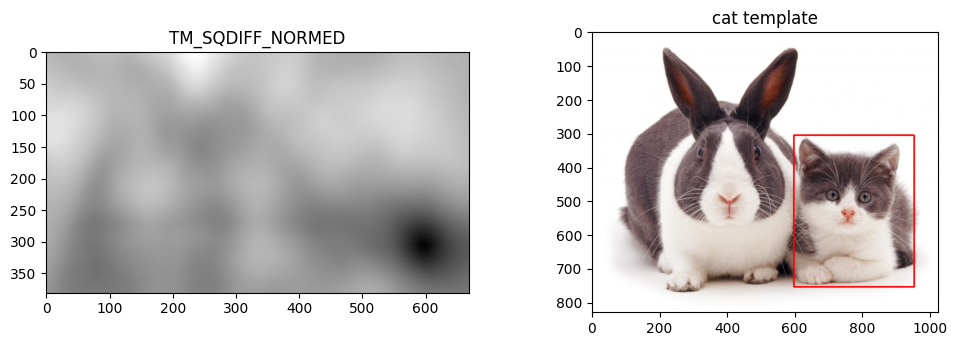

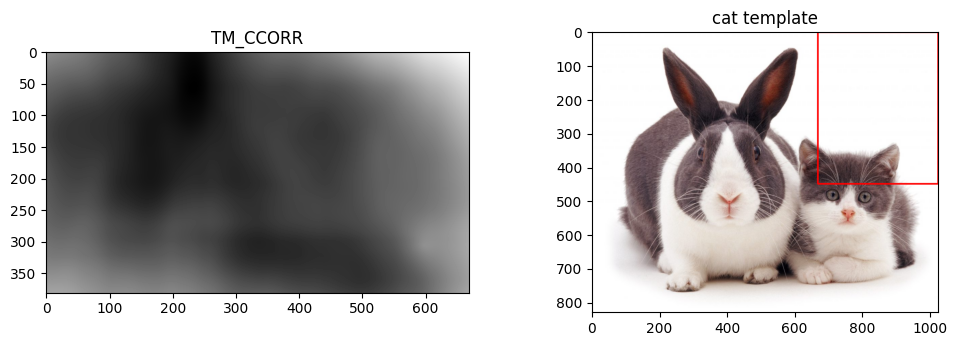

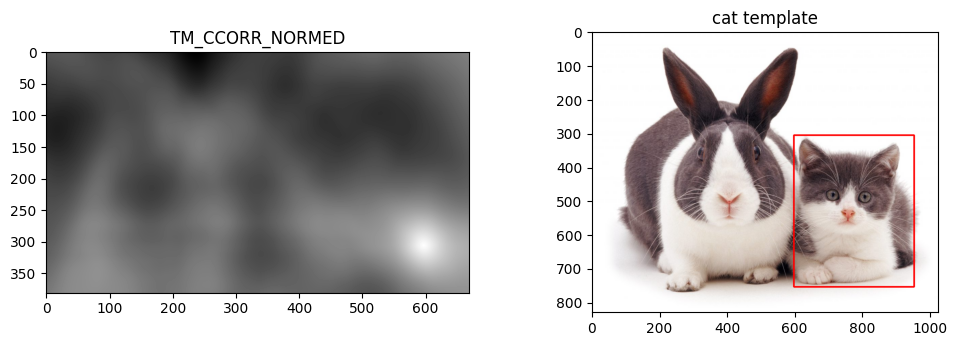

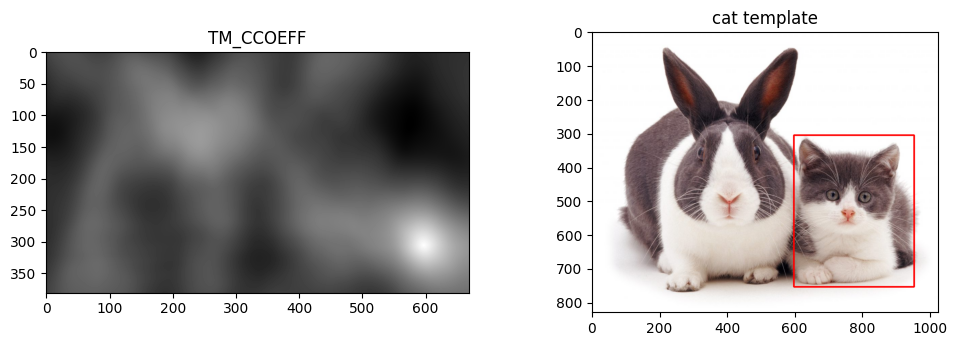

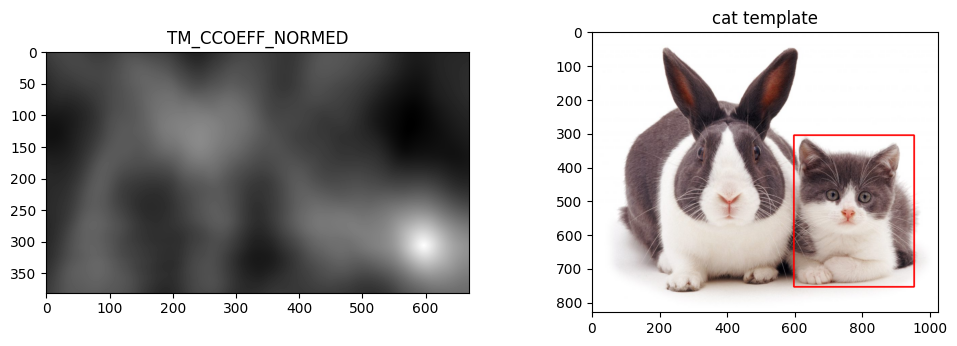

In [ ]:
MatchingMethod(cv.TM_SQDIFF, 'TM_SQDIFF')
MatchingMethod(cv.TM_SQDIFF_NORMED, 'TM_SQDIFF_NORMED')
MatchingMethod(cv.TM_CCORR, 'TM_CCORR')
MatchingMethod(cv.TM_CCORR_NORMED, 'TM_CCORR_NORMED')
MatchingMethod(cv.TM_CCOEFF, 'TM_CCOEFF')
MatchingMethod(cv.TM_CCOEFF_NORMED, 'TM_CCOEFF_NORMED')

## TEMPLATE MATCHING MULTI OBJECT TANPA OPENCV

In [ ]:
bahrain = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/bahrain.jpg')
template_bahrain = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/bahrain-template.jpg', 0)

Text(0.5, 1.0, 'bahrain template')

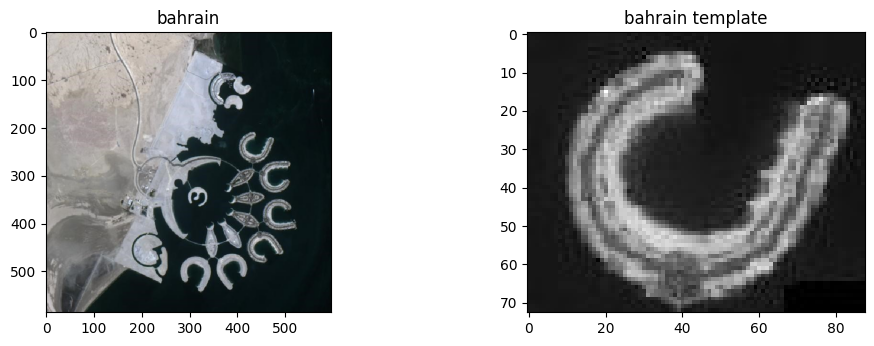

In [ ]:
# Tampilkan gambar dan histogram
plt.figure(figsize=(12, 8))

# Tampilkan citra asli dan citra tersegmentasi
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(bahrain, cv.COLOR_BGR2RGB))
plt.title('bahrain')

plt.subplot(2, 2, 2)
plt.imshow(template_bahrain, cmap='gray')
plt.title('bahrain template')

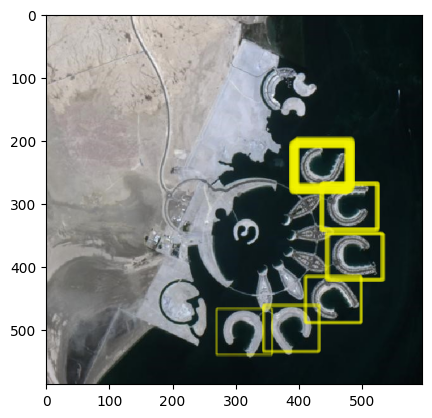

In [ ]:
bahrain_gray = cv.cvtColor(bahrain, cv.COLOR_BGR2GRAY)

from skimage.feature import match_template

result = match_template(bahrain_gray, template_bahrain)

threshold = 0.45

locations = np.where(result >= threshold)

fig, ax = plt.subplots()
ax.imshow(cv.cvtColor(bahrain, cv.COLOR_BGR2RGB))
# ax.set_axis_off()
height, width = template_bahrain.shape
for loc in zip(*locations[::-1]): # iterasi pada setiap lokasi yang ditemukan
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

## Edge Detection

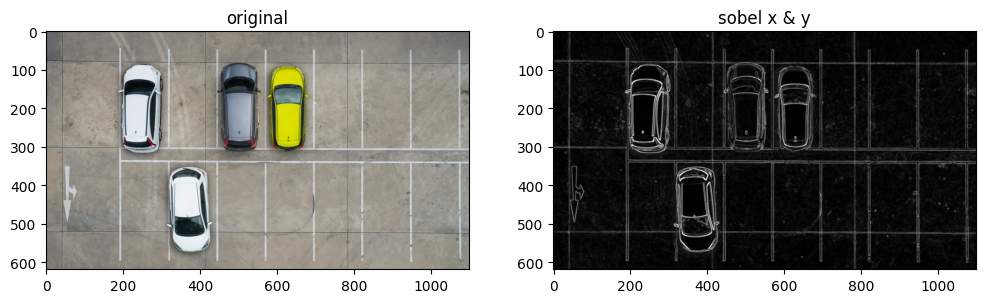

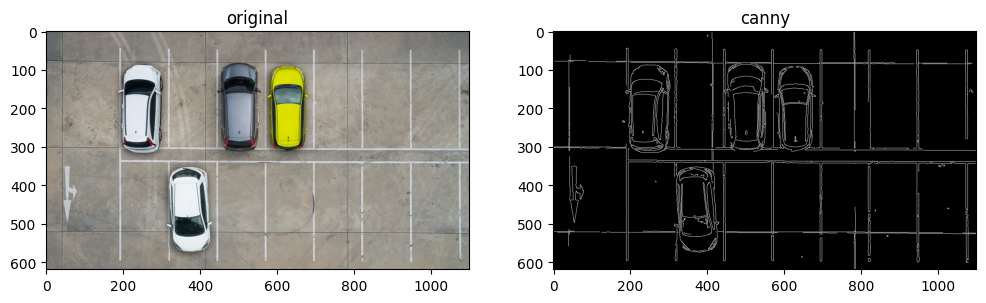

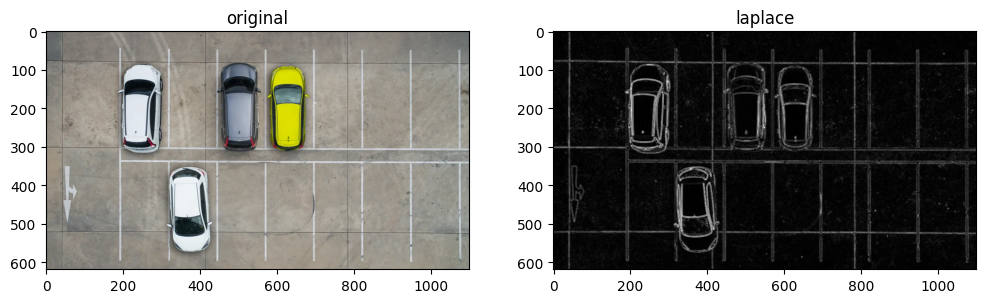

In [ ]:
car_park = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/car-park.jpg')
img_blur = cv.GaussianBlur(car_park, (3,3), 0)
img_gray = cv.cvtColor(img_blur, cv.COLOR_BGR2GRAY)


grad_x = cv.Sobel(img_gray, cv.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(img_gray, cv.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)


abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)


sobelxy = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
canny = cv.Canny(image=img_gray, threshold1=100, threshold2=200)
laplace = cv.convertScaleAbs(cv.Laplacian(img_gray, ksize=3, ddepth=cv.CV_16S))

methods = [[sobelxy , "sobel x & y"], [canny , "canny"], [laplace, "laplace"]]

for m in methods:
  plt.figure(figsize=(12, 8))

  plt.subplot(2, 2, 1)
  plt.imshow(cv.cvtColor(car_park, cv.COLOR_BGR2RGB))
  plt.title('original')

  plt.subplot(2, 2, 2)
  plt.imshow(m[0], cmap='gray')
  plt.title(m[1])

## Corner Detection

In [ ]:
chessboard = cv.imread("/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg")


Text(0.5, 1.0, 'shi-tomasi')

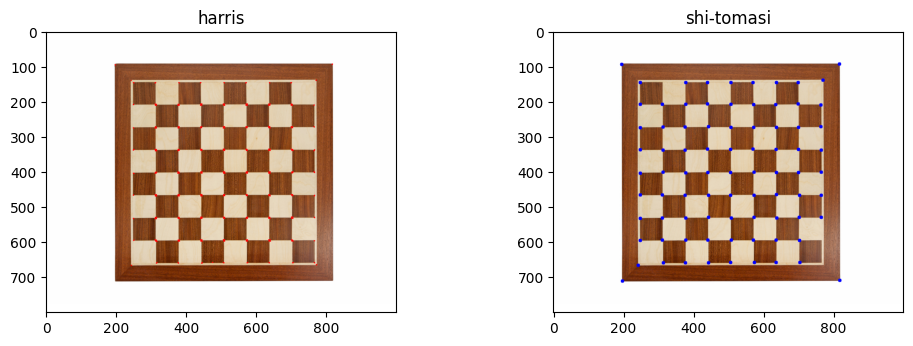

In [ ]:
display = chessboard.copy()
operatedImage = cv.cvtColor(chessboard, cv.COLOR_BGR2GRAY)

operatedImage = np.float32(operatedImage)

harris = cv.cornerHarris(operatedImage, 2, 5, 0.07)

# Results are marked through the dilated corners
harris = cv.dilate(harris, None)

# Reverting back to the original image,
# with optimal threshold value
display[harris > 0.01 * harris.max()]=[0, 0, 255]


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(display, cv.COLOR_BGR2RGB))
plt.title('harris')

display = chessboard.copy()
shi_tomasi = cv.goodFeaturesToTrack(cv.cvtColor(chessboard, cv.COLOR_BGR2GRAY) ,82,0.01,10)
corners = np.int0(shi_tomasi)
for i in corners:
    x,y = i.ravel()
    cv.circle(display,(x,y),5,255,-1)

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(display, cv.COLOR_BGR2RGB))
plt.title('shi-tomasi')

## Hough Transform

Text(0.5, 1.0, 'sudoku.jpg')

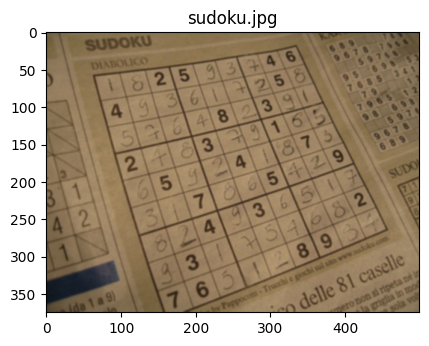

In [ ]:
sudoku = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/sudoku.jpg')
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(sudoku, cv.COLOR_BGR2RGB))
plt.title('sudoku.jpg')

Text(0.5, 1.0, 'hough transform sudoku.jpg')

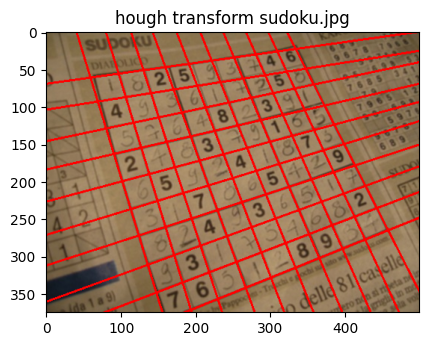

In [ ]:
import math

# sudoku_blur = cv.GaussianBlur(sudoku, (5,5), 0)
sudoku_gray = cv.cvtColor(sudoku, cv.COLOR_BGR2GRAY)
cdst = np.copy(sudoku)


# Apply edge detection
edges = cv.Canny(sudoku_gray, 90, 150, apertureSize=3)

kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Apply Hough Line Transform
lines = cv.HoughLines(edges, 1, np.pi/180, 150)


if lines is not None:
  if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(cdst, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(cdst, cv.COLOR_BGR2RGB))
plt.title('hough transform sudoku.jpg')

## findContours()

Text(0.5, 1.0, 'laptop.jpg')

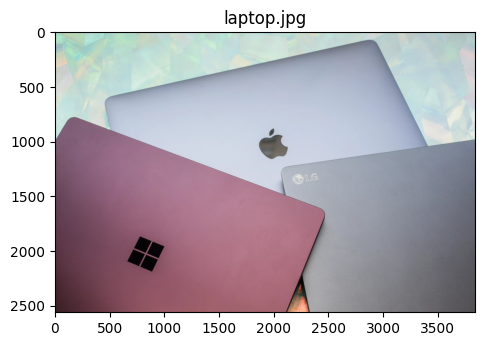

In [ ]:
laptop = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/laptop.jpg')

Text(0.5, 1.0, 'contours laptop.jpg')

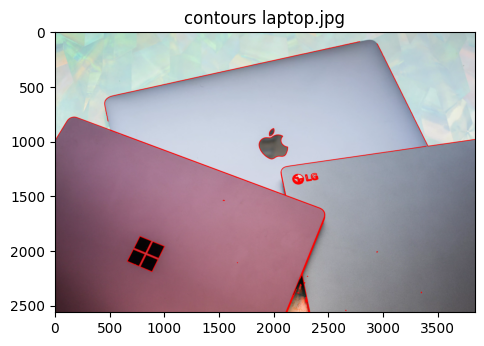

In [ ]:
laptop_gray = cv.cvtColor(laptop, cv.COLOR_BGR2GRAY)
edges = cv.Canny(laptop_gray, 50, 200, apertureSize=3)

display = np.copy(laptop)

contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# Draw contours
for i in range(len(contours)):
    color = (0, 0, 255)
    cv.drawContours(display, contours, i, color, 5, cv.LINE_8, hierarchy, 0)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(display, cv.COLOR_BGR2RGB))
plt.title('contours laptop.jpg')

## Pengayaan Materi KTP

In [ ]:
import os
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')

In [ ]:
# Lokasi hasil pelat
path_plate = '/content/drive/MyDrive/PCVK/KTP_More/'

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
  src = cv.imread(os.path.join(path_plate, name_file))
  blurred = src.copy()
  gray = blurred.copy()
  for i in range(10):
    blurred = cv.GaussianBlur(src, (5, 5), 0.5)

160.0 (636, 996)


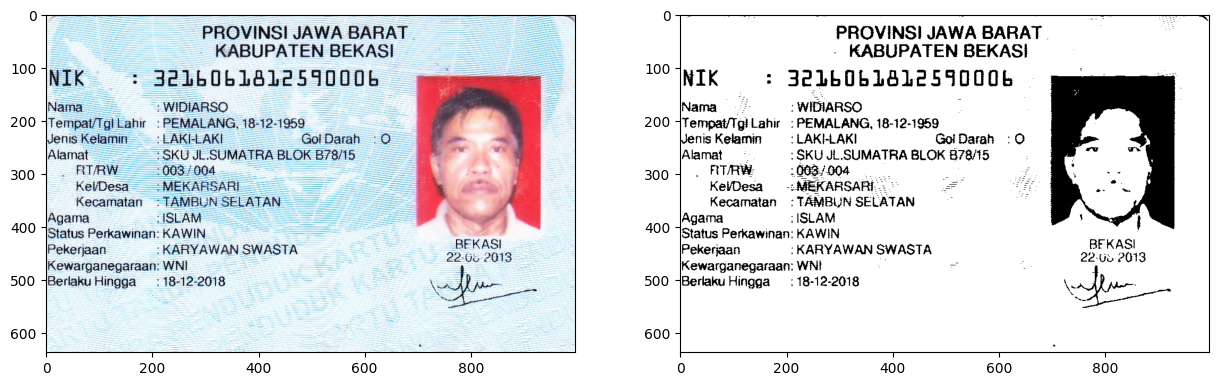

In [ ]:
# Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra

# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY
+ cv.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

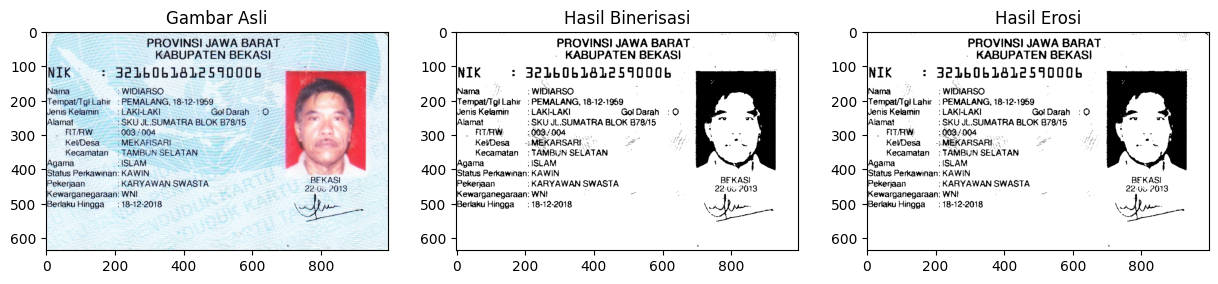

In [ ]:
# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()


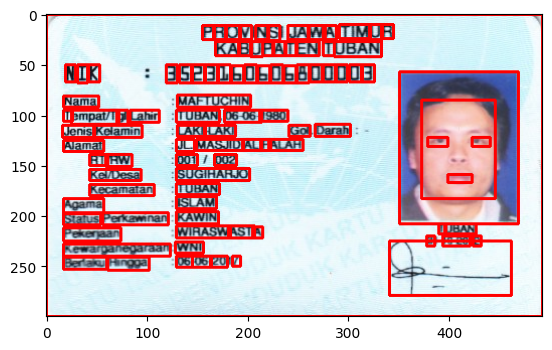

In [46]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

      # cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()

## Tugas Praktikum
### Kelompok 8 / KTP Galang Raka Bengkulu

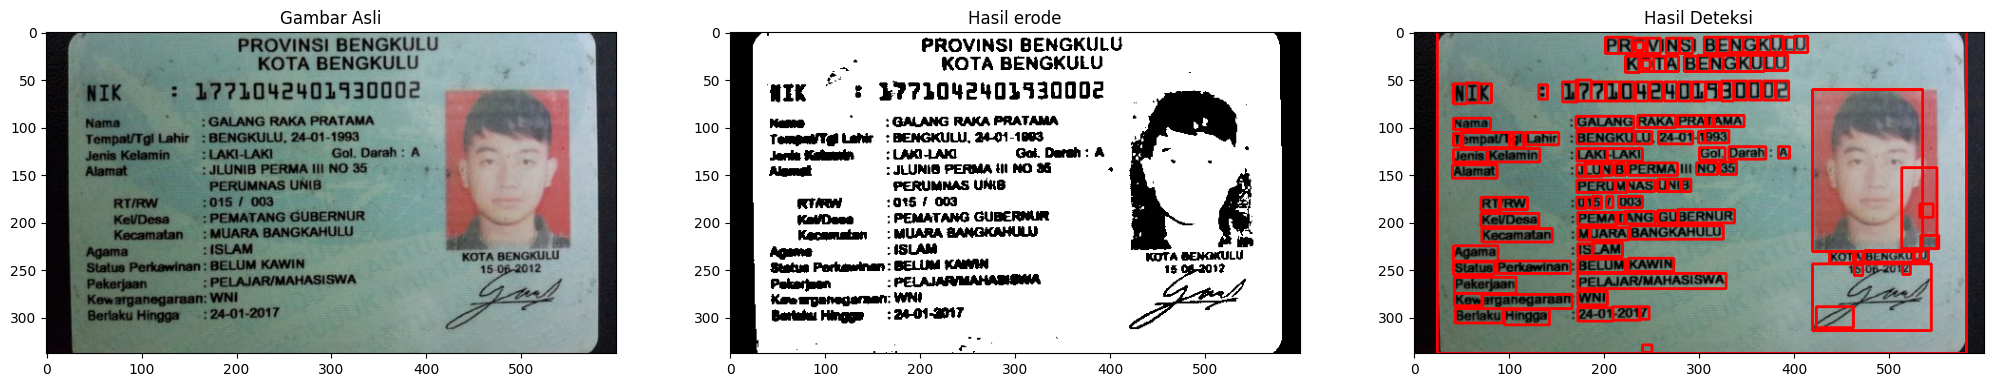

In [50]:
# Load the input image
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp1.png')
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)
output = ktp.copy()
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)
ret, bw = cv.threshold(gray.copy(), 100, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
erode = bw.copy()

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
      cv.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
      cv.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

      # cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
f, axarr = plt.subplots(1, 3, figsize=(25, 8))
axarr[0].imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(erode, cmap='gray')
axarr[1].set_title("Hasil erode")
axarr[2].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
axarr[2].set_title("Hasil Deteksi")
plt.show()